In [217]:
import string

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

import nltk
nltk.download("stopwords")
nltk.download('wordnet')


from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shrutirao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shrutirao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
df = pd.read_csv('data/cleaned_data.csv', index_col=0)

In [23]:
df

,floor,ground-floor,1-floor,2-floor,3-floor,emotion,comfort,occupation,usage,recruitment
1,NaN,NaN,NaN,NaN,NaN,I always feel a bit zen when I am here. It’s q...,"The light in the offices is perfect, as well a...",NaN,Yes,I will be only be participating in the survey
2,NaN,NaN,NaN,NaN,NaN,"Cold, a bit down","Temperature (it’s too cold), lack of light (bu...",NaN,Yes,I will be only be participating in the survey
3,NaN,NaN,NaN,NaN,NaN,Calm,Comfortable temperature and pleasant lighting....,NaN,Yes,I will be only be participating in the survey
4,6th Floor,NaN,NaN,NaN,NaN,"Hungry, a bit cold","Cold, quiet, well lit",NaN,Yes,I would like to participate in a building walk
5,Ground floor,Library learning room,NaN,NaN,NaN,Stressed about my exams but I am happy in this...,Usually it is really nice and comfortably warm...,Yes,Yes,I would like to participate in a building walk
...,...,...,...,...,...,...,...,...,...,...
79,Ground floor,Round tables by the three plants (across woode...,NaN,NaN,NaN,Neutral,NaN,NaN,NaN,NaN
80,Ground floor,Next to the lockers,NaN,NaN,NaN,Neutral,NaN,NaN,NaN,NaN
81,3rd Floor,NaN,NaN,NaN,Near the printer,NaN,NaN,NaN,NaN,NaN
82,2nd Floor,NaN,NaN,Unsure,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.describe()

,floor,ground-floor,1-floor,2-floor,3-floor,emotion,comfort,occupation,usage,recruitment
count,74,14,28,12,9,61,57,58,62,61
unique,7,5,6,3,3,55,55,2,2,2
top,1st Floor,Library learning room,Library learning room,Library learning room,Open lounge area,Calm,Ok,Yes,Yes,I will be only be participating in the survey
freq,29,5,7,9,5,3,2,48,54,44


# Students Across the Floors

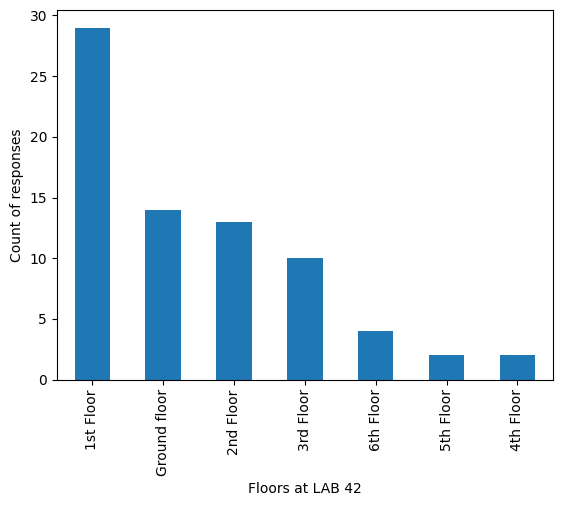

In [25]:
df.floor.value_counts().plot.bar()
plt.ylabel("Count of responses")
plt.xlabel("Floors at LAB 42")
plt.savefig('plots/floors-responses.jpg', dpi=300, bbox_inches=None)

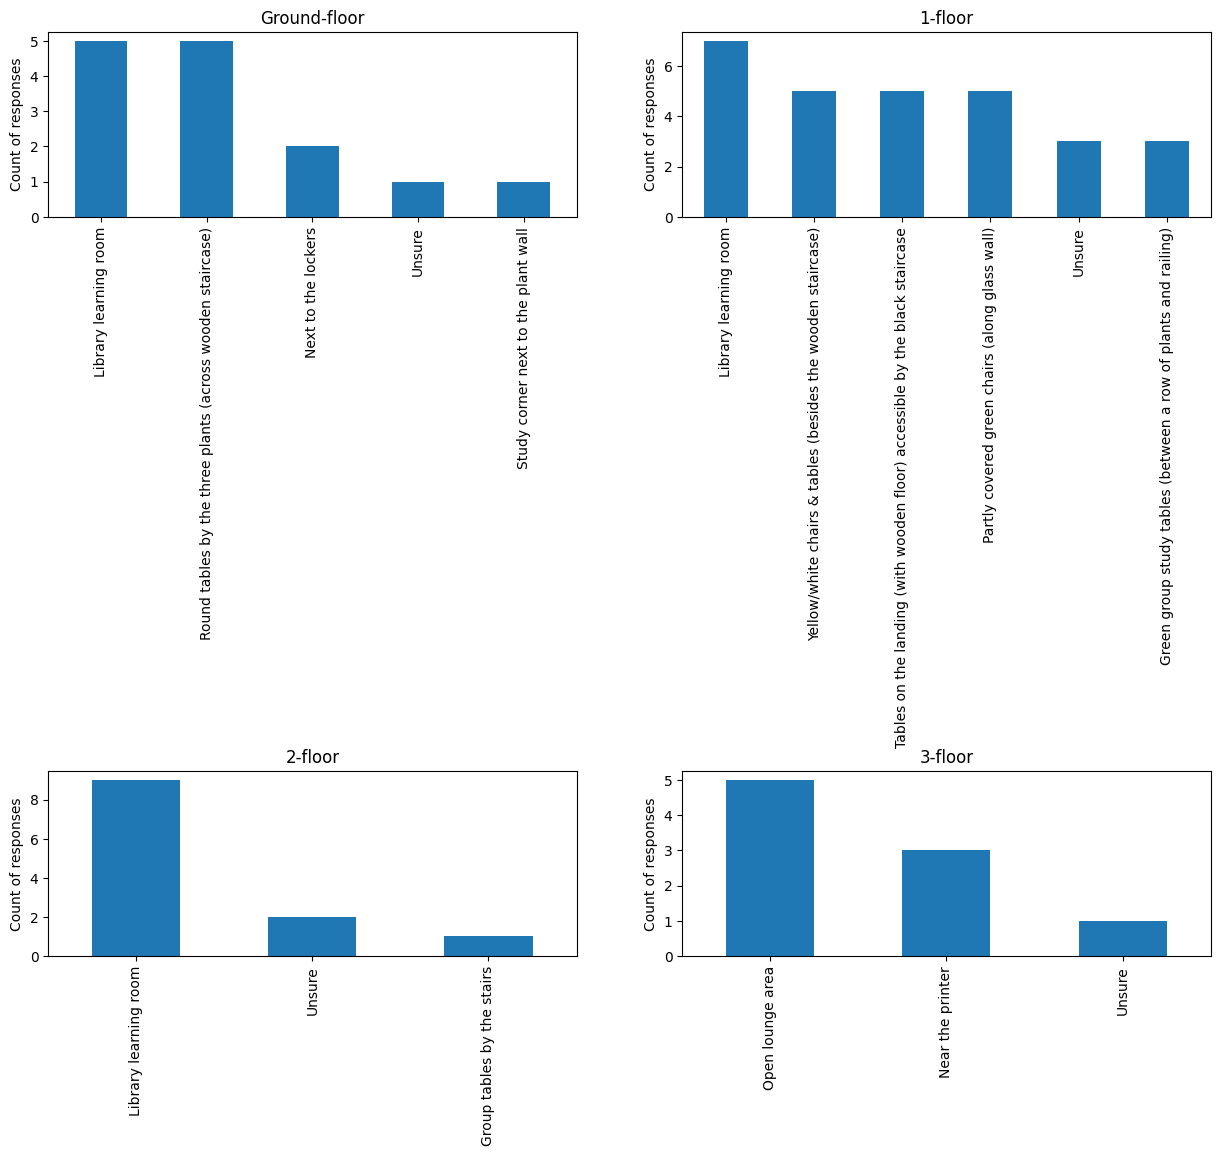

In [26]:
def plot_responses_rooms(floor, n):
    ax = plt.subplot(2, 2, n + 1)
    df[floor].value_counts().plot.bar(ax=ax)
    plt.ylabel("Count of responses")
    plt.title(floor.capitalize())

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=3)
floors = ['ground-floor', '1-floor', '2-floor', '3-floor']

for n, floor in enumerate(floors):
    plot_responses_rooms(floor, n)

plt.savefig('plots/spaces-per-floor.jpg',
            dpi=300, bbox_inches='tight')

# Emotions

In [92]:
df_emo = df.emotion.dropna()

df_emo = df_emo.apply(lambda x: x.replace('’', ''))

### Tokenise

In [93]:
df_emo

1     I always feel a bit zen when I am here. Its qu...
2                                      Cold, a bit down
3                                                  Calm
4                                    Hungry, a bit cold
5     Stressed about my exams but I am happy in this...
                            ...                        
75                        Convenient, and calm sometime
76                             Really nice, I feel calm
78                                              Relaxed
79                                              Neutral
80                                              Neutral
Name: emotion, Length: 61, dtype: object

In [94]:
import string

def apply_token(row):
    stop_words = set(stopwords.words("english"))
    words_in_sent = word_tokenize(row)

    filtered_list = []
    
    for word in words_in_sent:
        if word.casefold() not in stop_words:
            filtered_list.append(word)
    
    return filtered_list

In [95]:
df_emo = df_emo.apply(apply_token)

In [96]:
def cleanup(df_emo):
    combo_emo = []
    for row in df_emo:
        combo_emo.append(row)
    
    combo_emo = list(np.concatenate(combo_emo).flat)
    combo_emo = list(filter(lambda token: token not in string.punctuation,
                            combo_emo))
    combo_emo = [x.lower() for x in combo_emo]
    
    return combo_emo

In [97]:
combo_emo_list = cleanup(df_emo)

In [99]:
frequency_distribution = FreqDist(combo_emo_list)
frequency_distribution.most_common(30)

[('calm', 19),
 ('bit', 6),
 ('nice', 5),
 ('feel', 4),
 ('quiet', 4),
 ('neutral', 4),
 ('relaxed', 4),
 ('focused', 4),
 ('noisy', 3),
 ('cold', 3),
 ('stressed', 3),
 ('happy', 3),
 ('motivated', 3),
 ('peaceful', 3),
 ('day', 3),
 ('tired', 3),
 ('good', 3),
 ('study', 3),
 ('building', 3),
 ('always', 2),
 ('need', 2),
 ('hungry', 2),
 ('anxious', 2),
 ('normal', 2),
 ('lighting', 2),
 ('space', 2),
 ('peacefull', 2),
 ('chill', 2),
 ('chair', 2),
 ('areas', 2)]

<FreqDist with 144 samples and 227 outcomes>
[('calm', 19), ('bit', 6), ('nice', 5), ('feel', 4), ('quiet', 4), ('neutral', 4), ('relaxed', 4), ('focused', 4), ('noisy', 3), ('cold', 3), ('stressed', 3), ('happy', 3), ('motivated', 3), ('peaceful', 3), ('day', 3), ('tired', 3), ('good', 3), ('study', 3), ('building', 3), ('always', 2), ('need', 2), ('hungry', 2), ('anxious', 2), ('normal', 2), ('lighting', 2), ('space', 2), ('peacefull', 2), ('chill', 2), ('chair', 2), ('areas', 2)]


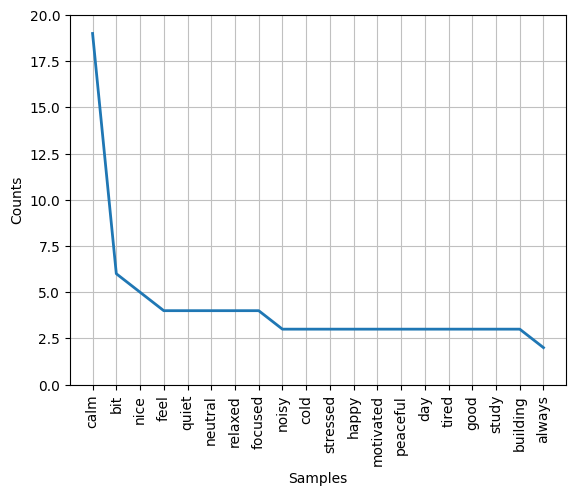

In [230]:
def frequency_distribution(lst, label):
    frequency_distribution = FreqDist(lst)
    print(frequency_distribution)
    print(frequency_distribution.most_common(30))
    
    plt.ylim(0,20)
    ax = frequency_distribution.plot(20)
    ax.set_xlabel("Most frequently occuring responses")
    ax.set_ylabel("Count of responses")
    ax.figure.savefig('plots/' + label + '-freq-dist.jpg',
            dpi=300, bbox_inches='tight')

frequency_distribution(combo_emo_list, 'emo')

calm (19), bit (6), nice (5), feel (4), quiet (4), neutral (4), relaxed (4), focused (4), noisy (3), cold (3), stressed (3), happy (3), motivated (3), peaceful (3), tired (3), good (3), study (3), building (3)

Interesting to note that words associated with emotion questions also included some words about comfort such as `cold` and `noisy`. Overall, we see that words associated with emotions are a mix of emotions, moods, sentiments, that are also typically associated with learning (`stressed`, `focused`, `motivated`)

### Lemmatisation

In [232]:
def lemmatiser(labels):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in labels]
    return lemmatized_words

def check_collocations(lst):
    return nltk.Text(lst).collocations()
    
def find_collocations(df_emo):
    lem_emo = df_emo.apply(lemmatiser)
    combined_emos = list(np.concatenate(lem_emo.to_list()).flat)
    return check_collocations(combined_emos)

In [185]:
find_collocations(df_emo)

feel bit; study Calm; calm Calm


study calm were the most frequently occuring pair of words (collocations) in the list of emotions.

# Comfort

In [224]:
df_comfort = df.comfort.dropna()
df_comfort = df_comfort.apply(lambda x: x.replace('’', ''))

### Tokenise

In [225]:
df_comfort = df_comfort.apply(apply_token)
combo_comfort_list = cleanup(df_comfort)

In [226]:
frequency_distribution = FreqDist(combo_comfort_list)
frequency_distribution.most_common(30)

[('comfortable', 23),
 ('light', 12),
 ('cold', 10),
 ('good', 10),
 ('bit', 10),
 ("'s", 10),
 ('noise', 9),
 ('temperature', 8),
 ('air', 8),
 ('nice', 8),
 ('room', 7),
 ('pretty', 7),
 ('space', 5),
 ('quality', 5),
 ('window', 5),
 ('fine', 5),
 ('like', 5),
 ('noisy', 5),
 ('little', 5),
 ('well', 4),
 ('lighting', 4),
 ('warm', 4),
 ('lot', 4),
 ('make', 4),
 ('feel', 4),
 ('blinds', 4),
 ('dark', 4),
 ('natural', 4),
 ('ok', 4),
 ('perfect', 3)]

<FreqDist with 219 samples and 445 outcomes>
[('comfortable', 23), ('light', 12), ('cold', 10), ('good', 10), ('bit', 10), ("'s", 10), ('noise', 9), ('temperature', 8), ('air', 8), ('nice', 8), ('room', 7), ('pretty', 7), ('space', 5), ('quality', 5), ('window', 5), ('fine', 5), ('like', 5), ('noisy', 5), ('little', 5), ('well', 4), ('lighting', 4), ('warm', 4), ('lot', 4), ('make', 4), ('feel', 4), ('blinds', 4), ('dark', 4), ('natural', 4), ('ok', 4), ('perfect', 3)]


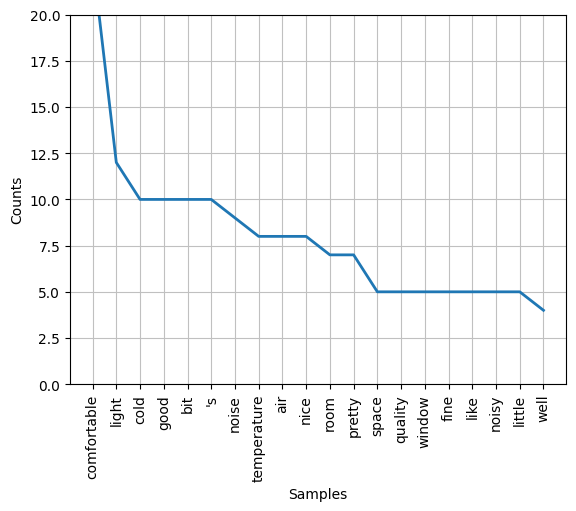

In [231]:
frequency_distribution(combo_comfort_list, 'comfort')

'comfortable' (23), 'light'(12), 'cold' (10), 'good' (10), 'noise' (9), 'temperature' (8), 'air' (8), 'nice' (8), 'room' (7), ('pretty', 7), ('space', 5), ('quality', 5), ('window', 5), ('fine', 5), ('like', 5), ('noisy', 5), ('little', 5), ('well', 4), ('lighting', 4), ('warm', 4), ('lot', 4), ('make', 4), ('feel', 4), ('blinds', 4), ('dark', 4), ('natural', 4), ('ok', 4), ('perfect', 3)

Most focus on light and temperature followed by noise. People also noted overall space and comfort as a whole. 

### Lemmatisation

In [233]:
find_collocations(df_comfort)

Pretty comfortable; air quality; could better; bit cold; many people;
sitting window; Air quality; quality could; feel comfortable; really
nice; people room; pretty comfortable; bit noisy; natural light


Air quality was the most ferquently occuring word.